In [1]:
from PIL import Image, ImageDraw
import numpy

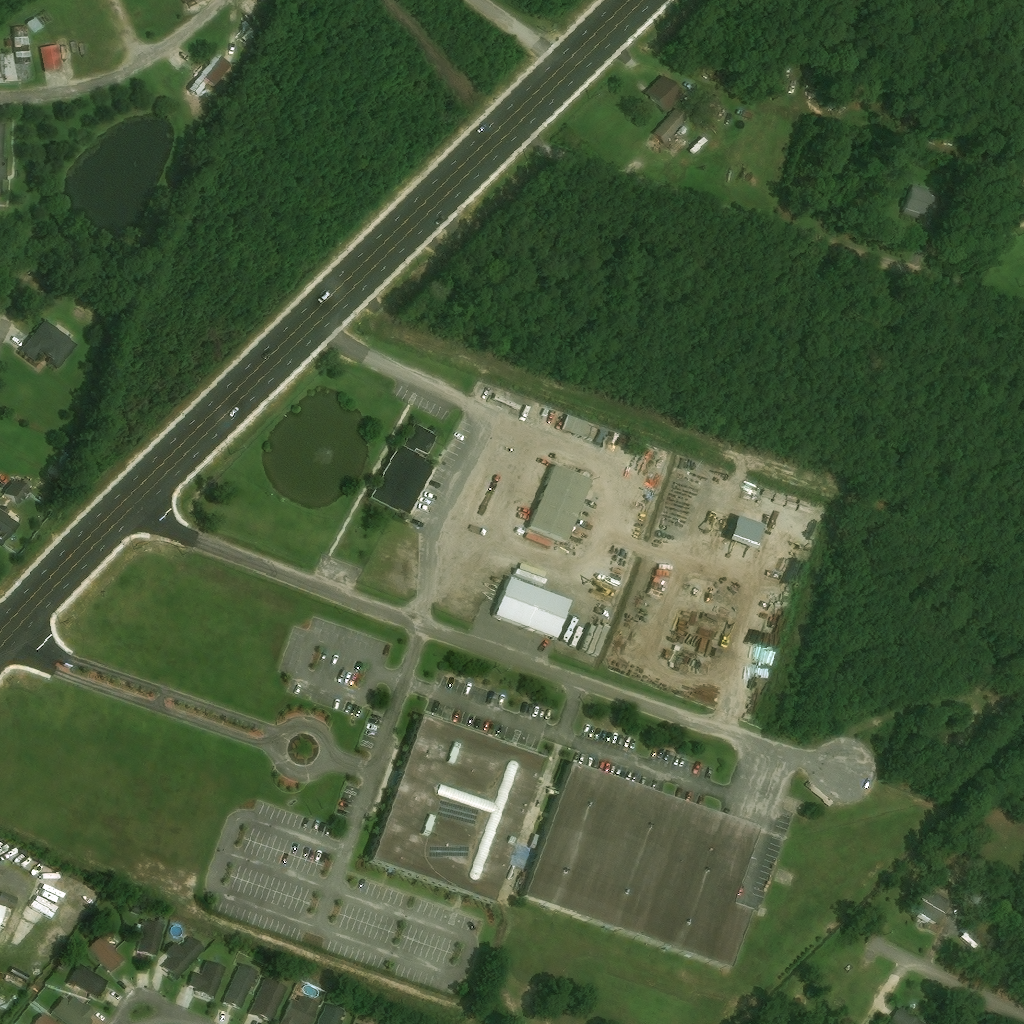

In [3]:
source = 'data/train_images/pre_images/hurricane-florence_00000012_pre_disaster.png'

image = Image.open(source).convert("RGBA")
image

In [45]:
## get json data for this file
import json

source = 'data/train_labels/pre_labels/hurricane-florence_00000012_pre_disaster.json'
with open (source) as f:
    json_data = json.load(f)
    
building = json_data['features']['xy'][4]['wkt']
building


'POLYGON ((952.4744901661048 902.2811217171165, 938.6794282921724 924.2332636556351, 936.5012167832577 922.7937789383551, 933.4082011715315 924.4139299730689, 929.0632506693445 921.7627737344463, 927.7376725500333 922.9410653960564, 916.2493288493356 915.9449586552471, 919.7637579456233 912.4865501881551, 914.3141590106769 909.0989616610264, 928.7433204235095 887.8840021143224, 952.4744901661048 902.2811217171165))'

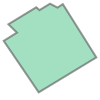

In [46]:
from shapely.geometry import Polygon
import shapely.wkt

building_poly = shapely.wkt.loads(building)
building_poly



In [47]:
x, y = building_poly.exterior.coords.xy
poly_xy = [(x[i], y[i]) for i in range(len(x))]
poly_xy          

[(952.4744901661048, 902.2811217171165),
 (938.6794282921724, 924.2332636556351),
 (936.5012167832577, 922.7937789383551),
 (933.4082011715315, 924.4139299730689),
 (929.0632506693445, 921.7627737344463),
 (927.7376725500333, 922.9410653960564),
 (916.2493288493356, 915.9449586552471),
 (919.7637579456233, 912.4865501881551),
 (914.3141590106769, 909.0989616610264),
 (928.7433204235095, 887.8840021143224),
 (952.4744901661048, 902.2811217171165)]

In [73]:
imArray = numpy.asarray(image)


# create mask
## polygon = [(100, 100), (300,100), (300,300), (100, 300)]
maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
ImageDraw.Draw(maskIm).polygon(poly_xy, outline=1, fill=1)
mask = numpy.array(maskIm)
# assemble new image (uint8: 0-255)
newImArray = numpy.empty(imArray.shape,dtype='uint8')

# colors (three first columns, RGB)
newImArray[:,:,:3] = imArray[:,:,:3]

# transparency (4th column)
newImArray[:,:,3] = mask*255

# back to Image from numpy
newIm = Image.fromarray(newImArray, "RGBA")

In [74]:
poly_bounds = building_poly.bounds
poly_bounds

(914.3141590106769, 887.8840021143224, 952.4744901661048, 924.4139299730689)

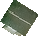

In [75]:
cropped_building_img = newIm.crop(poly_bounds)
cropped_building_img

In [76]:
from PIL import Image

img_w, img_h = cropped_building_img.size
background = Image.new('RGBA', (100, 75), (255, 255, 255, 0))
bg_w, bg_h = background.size
offset = ((bg_w - img_w) // 2, (bg_h - img_h) // 2)
background.paste(cropped_building_img, offset)


In [77]:
## save cropped_images 
background.save('data/train_images/pre_buildings/hurricane-florence_00000012_pre_disaster_1.png')